# Hypothesis Testing Exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


## 1). Has the network latency gone up since we switched internet service providers?


Ho (Null Hypothesis): Network latency has gone up begining on date internet service providers (ISP) were switched. 
    
H1 (Alternate Hypothesis): Network latency has not gone up begining on date internet service providers were switched.
    
True +ve: Accepting the Ho as expected since data inference sugest the network laterncy has gone up due to switching ISP. 
    
True -ve: We accept Ho but the cause for network latency was not attributed to the switching of ISP. Could be the weather, distance from the tower, a new service plan, e.t.c. that coincided with the switching of ISP.

Type I Error (False +ve): Reject Ho that network laterncy has not gone up (adapt H1) yet there is evidence inferred from data that this is not true. Swithching providers did not make network latency rise. 

Type II Error (False -ve): Failed to reject Ho above yet inference from statistical data suggest we should reject Ho and adapt H1 



## 2). Is the website redesign any good?

Good cannot be measured statistically. It has to be converted to 


Ho (Null Hypothesis): Website redesign has resulted in higher sales return 
    
H1 (Alternate Hypothesis): Website redesign did not affect sales return
    
True +ve: Accept Ho as inferred by statistical data
    
True -ve: Accept Ho but the cause os sales increase was not necessarily caused by the re-design.
    
Type I Error (False +ve): Rejected Ho above when inferred data sugest we should have kept the hypothesis 
    
Type II Error (False -ve): Did not reject Ho yet we should have. Website redesign did not affect sales return
    


## 3). Is our television ad driving more sales?


Ho (Null Hypothesis): Listing our ad on television has resulted in increased sales.
    
H1 (Alternate Hypothesis): Listing our ad on television did not result in increased sales.
    
True +ve: Increased sales was directlty as a result in increased sales. Accept Ho
    
True -ve: Increased sales was as a result of listing our tv ad. Other factors caused the spike in sales
    
Type I Error (False +ve): Adapted H1 
    
Type II Error (False -ve):

In [21]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1, 7, (nrows, ncols))

data[:4]


array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [22]:
calculated_averages = data.mean(axis=1)
calculated_averages


array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

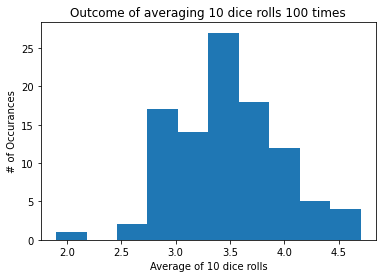

In [23]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')


In [32]:
import env

db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)

df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

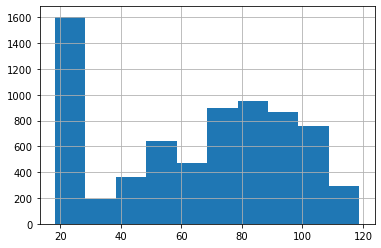

In [35]:
# Monthly Customers

df.monthly_charges.hist()

<AxesSubplot:>

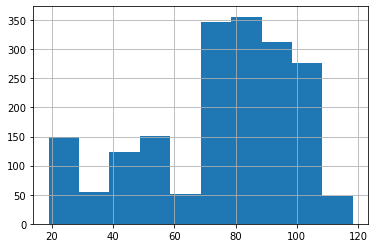

In [50]:
# Churned Customers

churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()

<AxesSubplot:>

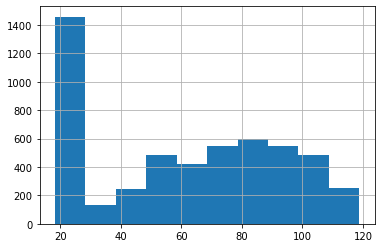

In [58]:
# Non-Churned Customers

no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [41]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [49]:
# Overall monthly Charges Mean

overall_mean = df.monthly_charges.mean()

overall_mean

64.7616924605992

In [51]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)

alpha = 0.05

print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


In [52]:
# Decile

if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [55]:
print(churn_sample.var())
print(no_churn_sample.var())

608.4141833954315
966.7527670734293


In [67]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t,p/2

(18.407526676414673, 4.2962246657737696e-73)

In [70]:
# ANOVA 

df = sns.load_dataset('iris')

df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [71]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [78]:
setosa_sepal_length = df[df.species == 'setosa'].sepal_length


setosa_sepal_length

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

<AxesSubplot:>

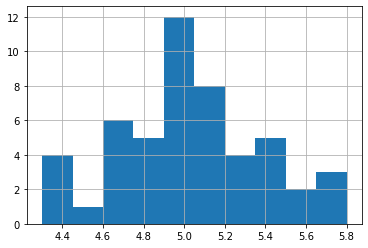

In [79]:
setosa_sepal_length.hist()

In [80]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
versicolor_sepal_length

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, dtype: float64

<AxesSubplot:>

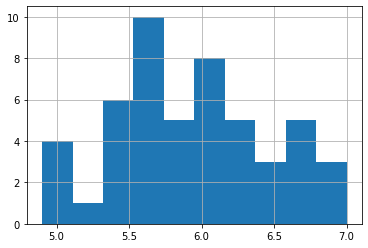

In [81]:
versicolor_sepal_length.hist()

In [77]:
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
virginica_sepal_length

100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
109    7.2
110    6.5
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, dtype: float64

<AxesSubplot:>

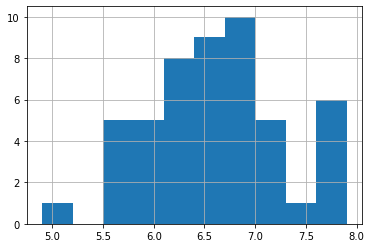

In [82]:
virginica_sepal_length.hist()

In [84]:
print("Setosa Var(): ", setosa_sepal_length.var())

print("Versicolor Var(): ", versicolor_sepal_length.var())

print("Virginica Var(): ", virginica_sepal_length.var())

Setosa Var():  0.12424897959183666
Versicolor Var():  0.2664326530612246
Virginica Var():  0.40434285714285706


In [88]:
f, p = stats.f_oneway(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

f, p

(119.26450218450468, 1.6696691907693826e-31)